> <h1> 키보드를 이용하여 serbot 조종 <
- 키보드를 이용하여 조종 
- q,w,a,s를 이용하여 조향이동
- esc 누르면 종료                               

In [ ]:
import pygame
import time
from pop import Pilot

bot = Pilot.SerBot()

# reset
pygame.init()

# window settings
screen_width = 640
screen_height = 480
screen = pygame.display.set_mode((screen_width, screen_height))

# game loop
while True:
    value = bot.getGyro()
    keys = pygame.key.get_pressed()
    if keys[pygame.K_UP]:
        if keys[pygame.K_RIGHT]:
            bot.move(45, 30)
        elif keys[pygame.K_LEFT]:
            bot.move(315, 30)
        else:
            bot.move(0, 30)
    elif keys[pygame.K_DOWN]:
        if keys[pygame.K_RIGHT]:
            bot.move(135, 30)
        elif keys[pygame.K_LEFT]:
            bot.move(215, 30)
        else:
            bot.move(180, 30)
    elif keys[pygame.K_LEFT]:
        bot.move(270, 30)
    elif keys[pygame.K_RIGHT]:
        bot.move(90, 30)
    elif keys[pygame.K_q]:
        bot.forward()
        bot.steering = -1.0
    elif keys[pygame.K_w]:
        bot.forward()
        bot.steering = 1.0
    elif keys[pygame.K_a]:
        bot.backward()
        bot.steering = -1.0
    elif keys[pygame.K_s]:
        bot.backward()
        bot.steering = 1.0
    elif keys[pygame.K_SPACE]:
        print('stop gyro : ', stop_value)
        print('forward gyro : ', forward_value)
        print('backward gyro : ', backward_value)
        print('left gyro : ', left_value)
        print('right gyro : ', right_value)
    elif keys[pygame.K_ESCAPE]:
        pygame.quit()
    else:
        # stop if no key is pressed
        bot.stop()
        value = bot.getGyro()
        stop_value.append(value)
        
        # check if the window's close button has been pressed
    for event in pygame.event.get():
        if event.type == pygame.K_ESCAPE:
            pygame.quit()
            #quit()


> <h1> gyro 센서 정보 수집

In [ ]:
import pygame
import time
from pop import Pilot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

bot = Pilot.SerBot()

forward_value = []

value = bot.getGyro()
forward_value.append(value)

> <h1> 수집한 gyro 센서를 이용하여 3d 산점도 그리기

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

stop_gyro = stop_value
        forward_gyro = forward_value
        backward_gyro = backward_value
        left_gyro = left_value
        right_gyro = right_value
        
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        stop_x = [item['x'] for item in stop_gyro]
        stop_y = [item['y'] for item in stop_gyro]
        stop_z = [item['z'] for item in stop_gyro]

        forward_x = [item['x'] for item in forward_gyro]
        forward_y = [item['y'] for item in forward_gyro]
        forward_z = [item['z'] for item in forward_gyro]

        backward_x = [item['x'] for item in backward_gyro]
        backward_y = [item['y'] for item in backward_gyro]
        backward_z = [item['z'] for item in backward_gyro]

        left_x = [item['x'] for item in left_gyro]
        left_y = [item['y'] for item in left_gyro]
        left_z = [item['z'] for item in left_gyro]

        right_x = [item['x'] for item in right_gyro]
        right_y = [item['y'] for item in right_gyro]
        right_z = [item['z'] for item in right_gyro]


        ax.scatter(stop_x, stop_y, stop_z, c='red', label='stop_gyro')
        ax.scatter(forward_x, forward_y, forward_z, c='green', label='forward_gyro')
        ax.scatter(backward_x, backward_y, backward_z, c='orange', label='backward_gyro')
        ax.scatter(left_x, left_y, left_z, c='blue', label='left_gyro')
        ax.scatter(right_x, right_y, right_z, c='yellow', label='right_gyro')

        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        ax.set_zlabel('Z Label')

        plt.show()

> <h1> 최종 
- 키보드로 serbot 조종
- 정지, 앞,뒤,좌,우 움직일 때 gyro센서 정보 리스트에 저장
- space bar를 누르면 저장된 데이터 출력
- z를 누르면 저장된 데이터를 이용하여 3d 산점도 그려서 출력

> <h1> 분석결과 
- 정지 데이터인 빨간색은 비슷한 값들을 가져서 한곳에 뭉쳐있음
- 정지 데이터를 제외한 나머지 동작들의 gyro 값들은 불규칙적임

stop gyro :  [{'x': -470, 'y': 68, 'z': 49}, {'x': -482, 'y': 75, 'z': 60}, {'x': -486, 'y': 46, 'z': 52}, {'x': -477, 'y': 46, 'z': 39}, {'x': -441, 'y': 88, 'z': 32}, {'x': -452, 'y': 72, 'z': 28}, {'x': -485, 'y': 70, 'z': 32}, {'x': -454, 'y': 32, 'z': 18}, {'x': -451, 'y': 59, 'z': 29}, {'x': -996, 'y': 112, 'z': -229}, {'x': -1252, 'y': 50, 'z': -171}, {'x': -1357, 'y': -123, 'z': 1582}]
forward gyro :  [{'x': -569, 'y': 131, 'z': -233}, {'x': -317, 'y': -352, 'z': 60}, {'x': -147, 'y': -422, 'z': 294}]
backward gyro :  [{'x': 230, 'y': 318, 'z': 296}, {'x': -254, 'y': -557, 'z': -314}, {'x': 388, 'y': -180, 'z': 22}, {'x': -462, 'y': -301, 'z': -469}, {'x': -448, 'y': -385, 'z': 160}, {'x': -403, 'y': 661, 'z': -92}]
left gyro :  [{'x': -751, 'y': -389, 'z': 607}, {'x': -755, 'y': -751, 'z': 662}, {'x': -953, 'y': 142, 'z': 6}, {'x': -349, 'y': 27, 'z': 869}]
right gyro :  [{'x': -948, 'y': 364, 'z': 1183}, {'x': -791, 'y': 233, 'z': 171}, {'x': -653, 'y': -23, 'z': -413}, {'x':

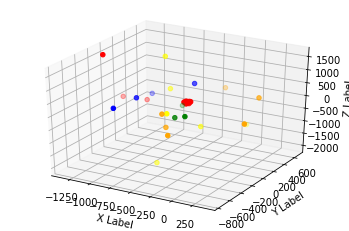

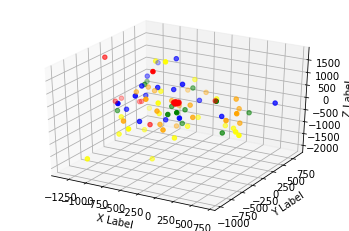

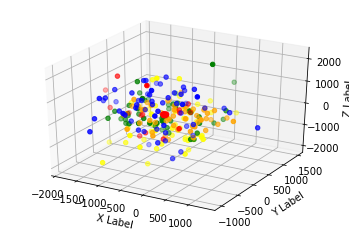

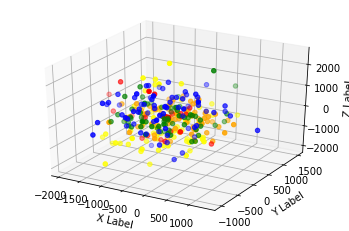

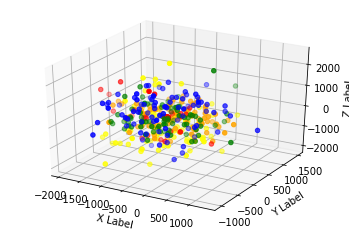

error: video system not initialized

In [4]:
import pygame
import time
from pop import Pilot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

bot = Pilot.SerBot()

# reset
pygame.init()

# window settings
screen_width = 640
screen_height = 480
screen = pygame.display.set_mode((screen_width, screen_height))

stop_value = []
forward_value = []
backward_value = []
left_value = []
right_value = []

# game loop
while True:
    value = bot.getGyro()
    keys = pygame.key.get_pressed()
    if keys[pygame.K_UP]:
        if keys[pygame.K_RIGHT]:
            bot.move(45, 30)
        elif keys[pygame.K_LEFT]:
            bot.move(315, 30)
        else:
            bot.move(0, 30)
            value = bot.getGyro()
            forward_value.append(value)
    elif keys[pygame.K_DOWN]:
        if keys[pygame.K_RIGHT]:
            bot.move(135, 30)
        elif keys[pygame.K_LEFT]:
            bot.move(215, 30)
        else:
            bot.move(180, 30)
            value = bot.getGyro()
            backward_value.append(value)
    elif keys[pygame.K_LEFT]:
        bot.move(270, 30)
        value = bot.getGyro()
        left_value.append(value)
    elif keys[pygame.K_RIGHT]:
        bot.move(90, 30)
        value = bot.getGyro()
        right_value.append(value)
    elif keys[pygame.K_q]:
        bot.forward()
        bot.steering = -1.0
    elif keys[pygame.K_w]:
        bot.forward()
        bot.steering = 1.0
    elif keys[pygame.K_a]:
        bot.backward()
        bot.steering = -1.0
    elif keys[pygame.K_s]:
        bot.backward()
        bot.steering = 1.0
    elif keys[pygame.K_SPACE]:
        print('stop gyro : ', stop_value)
        print('forward gyro : ', forward_value)
        print('backward gyro : ', backward_value)
        print('left gyro : ', left_value)
        print('right gyro : ', right_value)
    elif keys[pygame.K_ESCAPE]:
        pygame.quit()
    elif keys[pygame.K_z]:
        
        stop_gyro = stop_value
        forward_gyro = forward_value
        backward_gyro = backward_value
        left_gyro = left_value
        right_gyro = right_value
        
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        stop_x = [item['x'] for item in stop_gyro]
        stop_y = [item['y'] for item in stop_gyro]
        stop_z = [item['z'] for item in stop_gyro]

        forward_x = [item['x'] for item in forward_gyro]
        forward_y = [item['y'] for item in forward_gyro]
        forward_z = [item['z'] for item in forward_gyro]

        backward_x = [item['x'] for item in backward_gyro]
        backward_y = [item['y'] for item in backward_gyro]
        backward_z = [item['z'] for item in backward_gyro]

        left_x = [item['x'] for item in left_gyro]
        left_y = [item['y'] for item in left_gyro]
        left_z = [item['z'] for item in left_gyro]

        right_x = [item['x'] for item in right_gyro]
        right_y = [item['y'] for item in right_gyro]
        right_z = [item['z'] for item in right_gyro]


        ax.scatter(stop_x, stop_y, stop_z, c='red', label='stop_gyro')
        ax.scatter(forward_x, forward_y, forward_z, c='green', label='forward_gyro')
        ax.scatter(backward_x, backward_y, backward_z, c='orange', label='backward_gyro')
        ax.scatter(left_x, left_y, left_z, c='blue', label='left_gyro')
        ax.scatter(right_x, right_y, right_z, c='yellow', label='right_gyro')

        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        ax.set_zlabel('Z Label')

        plt.show()
    else:
        # stop if no key is pressed
        bot.stop()
        value = bot.getGyro()
        stop_value.append(value)
        
        # check if the window's close button has been pressed
    for event in pygame.event.get():
        if event.type == pygame.K_ESCAPE:
            pygame.quit()
            #quit()
